In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
#nltk.download()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Loading Data**

In [3]:
train_file_path ='train.txt'
test_file_path='test.txt'
train = pd.read_csv(train_file_path,  delimiter='\t')
train

,"1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
0,2 ::: Cupid (1997) ::: thriller ::: A brother ...
1,"3 ::: Young, Wild and Wonderful (1980) ::: adu..."
2,4 ::: The Secret Sin (1915) ::: drama ::: To h...
3,5 ::: The Unrecovered (2007) ::: drama ::: The...
4,6 ::: Quality Control (2011) ::: documentary :...
...,...
54208,"54210 ::: ""Bonino"" (1953) ::: comedy ::: This ..."
54209,54211 ::: Dead Girls Don't Cry (????) ::: horr...
54210,54212 ::: Ronald Goedemondt: Ze bestaan echt (...
54211,54213 ::: Make Your Own Bed (1944) ::: comedy ...


## **Loading Again\***

## Train Data :

In [4]:
columns = [ 'Title', 'Genre','Description']
train = pd.read_csv(train_file_path, sep=':::', names=columns, engine='python')
train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## **Test data :**

In [5]:
test_columns = ['Title', 'Description']
test = pd.read_csv(test_file_path, sep=':::', names=test_columns, engine='python')
test.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## **Checking Missing Values**

In [8]:
print("==="*15)
print('missing value percentage in train data : ')
print("==="*15)
print(train.isnull().sum()*100/len(train))
print("==="*15)
print('missing value percentage in test data :')
print("==="*15)
print(test.isnull().sum()*100/len(test))

missing value percentage in train data : 
Title          0.0
Genre          0.0
Description    0.0
dtype: float64
missing value percentage in test data :
Title          0.0
Description    0.0
dtype: float64


In [9]:
train = train.sample(25000)

## **Exploratory Data Analysis**

In [10]:
train.nunique()

Title          25000
Genre             27
Description    24970
dtype: int64

In [11]:
test.nunique()

Title          54200
Description    54072
dtype: int64

In [12]:
unique_Genre =train.Genre.unique().tolist()
unique_Genre

[' drama ',
 ' documentary ',
 ' short ',
 ' comedy ',
 ' crime ',
 ' thriller ',
 ' reality-tv ',
 ' news ',
 ' family ',
 ' musical ',
 ' music ',
 ' action ',
 ' history ',
 ' adventure ',
 ' western ',
 ' horror ',
 ' romance ',
 ' biography ',
 ' war ',
 ' talk-show ',
 ' game-show ',
 ' adult ',
 ' sci-fi ',
 ' animation ',
 ' fantasy ',
 ' sport ',
 ' mystery ']

In [13]:
print(f'Total number of unique Genre : {len(unique_Genre)}')

Total number of unique Genre : 27


In [14]:
Genre_count =train.Genre.value_counts()
print(Genre_count)

Genre
 drama           6309
 documentary     6025
 comedy          3466
 short           2294
 horror          1019
 thriller         753
 action           596
 western          478
 reality-tv       420
 adventure        370
 family           350
 music            339
 romance          317
 sci-fi           316
 adult            262
 animation        240
 crime            223
 sport            181
 talk-show        169
 fantasy          153
 mystery          128
 biography        124
 musical          123
 history          111
 game-show         86
 news              86
 war               62
Name: count, dtype: int64


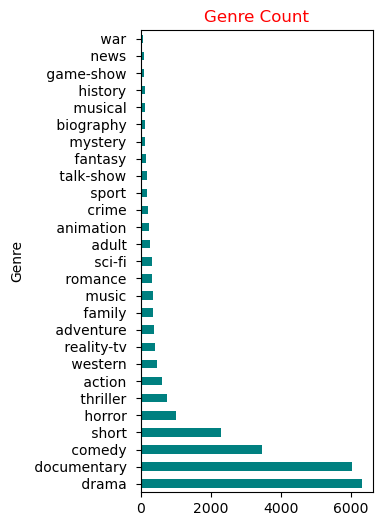

In [15]:
Genre_count.plot(kind= 'barh', figsize=(3,6), color = 'teal')
plt.title('Genre Count', color ='red')
plt.show()

In [16]:
# Choosing only Darama
train['Genre'] = train['Genre'].str.strip()
drama = train[train['Genre'] == 'drama'].reset_index(drop=True)
drama.head(10)

,Title,Genre,Description
0,Svetat e golyam i spasenie debne otvsyakade (...,drama,"What's in a game? For a young man, who has le..."
1,The Dangers of Dreaming (2007),drama,Max's simple life becomes complicated when hi...
2,Samo ljudi (1957),drama,An one-legged engineer of hydro construction ...
3,Six Thugs (2006),drama,Released after a five-year stretch for a crim...
4,To Dream (2016),drama,"If your dreams could come true, what would yo..."
5,"""Portail Sciences"" (2015)",drama,"Portail Sciences, a popular science show, is ..."
6,Loin (2001),drama,"In Tangier, intercontinental truck driver Ser..."
7,Joey (1975),drama,Violent and dramatic events dog the life of h...
8,De Nova... The Road Less Trodden (2010),drama,Everyone in the world inevitably has or had t...
9,The Squad Movie (2017),drama,"In 2017, Sebastian is an isolated teenager wh..."


In [17]:
len(drama)

6309

In [18]:
drama.Description[1]

" Max's simple life becomes complicated when his dreams start predicting the future. Max struggles to maintain his relationship with Elise and his tenuous grip on reality. When a great danger appears on the horizon, Max finds himself facing a series of drastic choices. Max, Sean and Teddy each have their own reasons for wanting to stay in their Kentucky hometown, even though everyone else they know has moved on. Elise quickly catches Max's eye when she moves to town for the summer. After a chance encounter with a mysterious woman, Max is granted the power of foresight. Max's world turns upside down as his dreams begin to predict the future. Grappling with the question of what is and is not certain in life, Max struggles to maintain his relationship with Elise and his tenuous grip on reality. When a great danger appears on the horizon, Max finds himself facing a series of drastic choices."

In [19]:
drama.Description[800]

' "To Better Days" takes place in a day in Istanbul. It tells about five different character\'s paths crossing in daily life and intervention to each other\'s lives without awareness. The film tells all stories by nestling with its non-linear speculation. A time frame of one day; advances by jumping to the past, present and future.'

In [20]:
!pip install langdetect -q

# **Language Detection**

In [21]:
from tqdm import tqdm
from langdetect import detect
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
# Applying on train data
tqdm.pandas(desc="Detecting language for train data")
train['Language'] = train['Description'].progress_apply(lambda x: detect_language(x))

Detecting language for train data: 100%|████████████████████████████████████████| 25000/25000 [02:19<00:00, 178.63it/s]


In [24]:
tqdm.pandas(desc="Detecting language for test data")
test['Language'] = test['Description'].progress_apply(lambda x: detect_language(x))

Detecting language for test data: 100%|█████████████████████████████████████████| 54200/54200 [05:52<00:00, 153.93it/s]


In [22]:
train

,Title,Genre,Description,Language
11211,Svetat e golyam i spasenie debne otvsyakade (...,drama,"What's in a game? For a young man, who has le...",en
9656,Care (2016/I),documentary,Let's face it. We're all aging. With good hab...,en
50470,The Dangers of Dreaming (2007),drama,Max's simple life becomes complicated when hi...,en
13978,The Lonely (2009),documentary,A documentary portrait of the filmmaker 'Harm...,en
47091,Shrink (2013),short,"A woman is on her way to work, she is alone i...",en
...,...,...,...,...
10757,Friends: A XXX Parody (2009),adult,"Just before Sandler and Moanica's wedding, Fr...",en
12329,CNN Future Summit: Virtual Worlds (2007),reality-tv,Future Summit: Virtual Worlds examines comput...,en
19415,Das geteilte Glück (2010),drama,Nicole Wagner finds out by coincidence that t...,en
3661,Den ödesdigra klockan (1966),drama,"Sven Bertil, a pastor's son, accidentally is ...",en


In [25]:
total_lan_train = train.Language.unique()
print(f'Total language detected in train data : {len(total_lan_train)}')
print(total_lan_train)
print('==========='*6)
total_lan_test = test.Language.unique()
print(f'Total language detected  in test data: {len(total_lan_test)}')
print(total_lan_test)

Total language detected in train data : 9
['en' 'it' 'fr' 'no' 'es' 'hu' 'ca' 'de' 'sq']
Total language detected  in test data: 10
['en' 'hu' 'fr' 'it' 'no' 'de' 'es' 'pt' 'ro' 'pl']


In [26]:
common_languages = set(total_lan_train) & set(total_lan_test)
print(f"Common languages: {common_languages}")

Common languages: {'no', 'en', 'it', 'de', 'es', 'fr', 'hu'}


In [27]:
unique_to_train = set(total_lan_train) - set(total_lan_test)
unique_to_test = set(total_lan_test) - set(total_lan_train)

print(f"Languages unique to train data: {unique_to_train}")
print(f"Languages unique to test data: {unique_to_test}")

Languages unique to train data: {'ca', 'sq'}
Languages unique to test data: {'ro', 'pl', 'pt'}


In [28]:
language_count_train = train.Language.value_counts()
language_count_train

Language
en    24821
fr       74
it       53
hu       20
no       12
es       12
de        6
ca        1
sq        1
Name: count, dtype: int64

In [29]:
language_count_test = test.Language.value_counts()
language_count_test

Language
en    53813
fr      144
it      107
hu       54
es       47
de       21
no       11
pt        1
ro        1
pl        1
Name: count, dtype: int64

In [30]:
concatenated_series = pd.concat([language_count_train, language_count_test], axis=1)

concatenated_series.columns =['count_train','count_test']
concatenated_series

,count_train,count_test
Language,,
en,24821.0,53813.0
fr,74.0,144.0
it,53.0,107.0
hu,20.0,54.0
no,12.0,11.0
es,12.0,47.0
de,6.0,21.0
ca,1.0,NaN
sq,1.0,NaN


<Axes: ylabel='Language'>

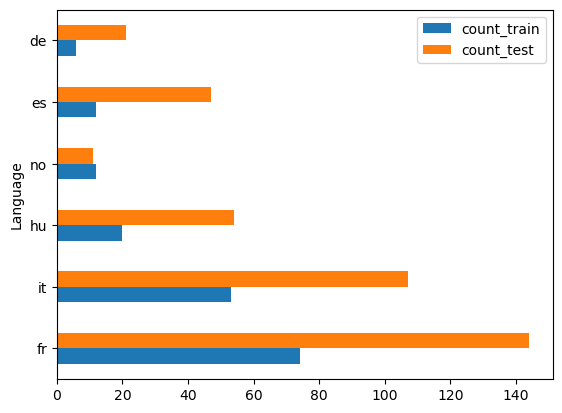

In [31]:
concatenated_series.dropna()[1:].plot(kind='barh')  # language count except english

In [32]:
non_english_train = train[train['Language'] != 'en']
non_english_test =test[test['Language']!='en']
non_english_train.head()

,Title,Genre,Description,Language
8139,Yvonne la Nuit (1949),drama,Carlo Rutelli si innamora della bella cantent...,it
35238,"""450, chemin du golf"" (2003)",comedy,François et Dorianne forment un jeune couple ...,fr
35244,"""Ayoye"" (2001)",sci-fi,"En 1967, une dénommée Ginette a été kidnappée...",fr
4057,Un éléphant ça trompe énormément (1976),comedy,"Quatre amis, Etienne, Daniel, Simon et Bouly ...",fr
30077,Le faremo tanto male (1998),comedy,Two brothers kidnap a has-been actress who ma...,it


In [34]:
non_english_train['Description'].loc[8139]

" Carlo Rutelli si innamora della bella cantente di varieta' Yvonne la Nuit, ma il padre di Carlo si oppone al matrimonio. Scoppia la prima guerra mondiale e Carlo vine ucciso in guerra mentre Yvonne ha un bambino che le viene fatto credere morto per ordine del padre di Carlo. La carriera di Yvonne inizia una parabola discendente e le rimane vicino solo Nino, compagno d'arte, col quale si guadagna da vivere cantando nelle osterie. Alla morte del padre di Carlo, l'avvocato Rubinordo le comunica che il figlio e' vivo, ma Yvonne, per evitare di essere vista nello stato in cui si e' ridotta, preferisce che il figlio continui a crederla morta."

In [35]:
Lang_Genre_result = non_english_train.groupby(['Language','Genre'])[['Title']].count()
Lang_Genre_result

Title
Language Genre             
ca       short            1
de       drama            3
         short            1
         sport            1
         thriller         1
es       comedy           2
         documentary      1
         drama            3
         short            6
fr       biography        1
         comedy          20
         documentary      9
         drama           26
         family           5
         music            1
         news             1
         reality-tv       1
         romance          1
         sci-fi           1
         short            5
         talk-show        3
hu       adventure        2
         comedy           6
         documentary      1
         drama           10
         short            1
it       adventure        1
         biography        1
         comedy          33
         documentary      1
         drama           14
         horror           1
         thriller         2
no       comedy           2
         documentary      1
         drama            9
sq       comedy           1

<Axes: xlabel='Language,Genre'>

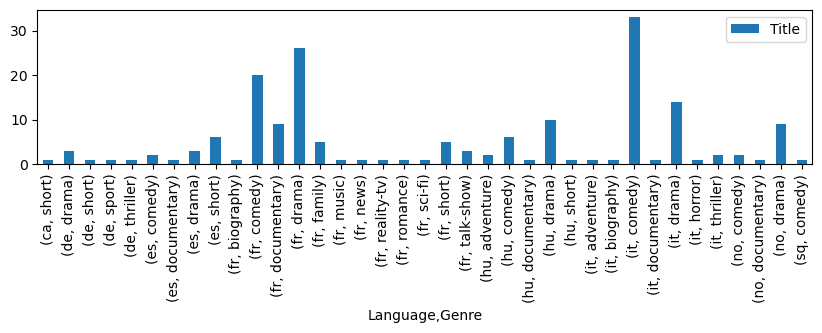

In [36]:
Lang_Genre_result.plot(kind='bar',figsize=(10,2))

# Translation of detected language to English

In [37]:
#!pip install -U textblob -q

In [38]:
#!python -m textblob.download_corpora

In [39]:
# for lang in non_english_train.Language:
#     if lang!='en':
#         for row in non_english_train.Description:
#             blob = TextBlob(row)
#             text = blob.translate(from_lang= lang, to='en')
#             print (text)     

In [40]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated
from tqdm import tqdm

def translate_to_english(description, language):
    try:
        blob = TextBlob(description)
        translated_text = str(blob.translate(from_lang=language, to='en'))
        return translated_text
    except NotTranslated:
        # Handle the case where translation is not possible
        return "Translation not available"

def translate_descriptions(df):
    translations = []

    for index, row in tqdm(df.iterrows(), total=len(df), desc="Translating Descriptions"):
        if row['Language'] != 'en':
            translated_description = translate_to_english(row['Description'], row['Language'])
            translations.append(translated_description)
        else:
            # If the language is already English, keep the original description
            translations.append(row['Description'])

    df['Translated_Description'] = translations
    return df

In [41]:
train = translate_descriptions(train)
train[train.Language !='en']

Translating Descriptions: 100%|█████████████████████████████████████████████████| 25000/25000 [02:21<00:00, 177.11it/s]


,Title,Genre,Description,Language,Translated_Description
8139,Yvonne la Nuit (1949),drama,Carlo Rutelli si innamora della bella cantent...,it,Carlo Rutelli falls in love with the beautiful...
35238,"""450, chemin du golf"" (2003)",comedy,François et Dorianne forment un jeune couple ...,fr,François and Dorianne form a young couple typi...
35244,"""Ayoye"" (2001)",sci-fi,"En 1967, une dénommée Ginette a été kidnappée...",fr,"In 1967, a man named Ginette was kidnapped by ..."
4057,Un éléphant ça trompe énormément (1976),comedy,"Quatre amis, Etienne, Daniel, Simon et Bouly ...",fr,"Four friends, Etienne, Daniel, Simon and Bouly..."
30077,Le faremo tanto male (1998),comedy,Two brothers kidnap a has-been actress who ma...,it,Two Brothers Kidnap in Has-Been Actress Who Ma...
...,...,...,...,...,...
5572,Asini (1999),comedy,Italo č un quarantenne milanese poco incline ...,it,Italo is a forty -year -old Milanese little in...
28537,Poveri ma belli (1957),comedy,Salvatore e Romolo sono giovani e vogliono di...,it,Salvatore and Romolo are young and want to hav...
53879,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,hu,Early Delutan is a school -haired little trap:...
10647,Emberek a havason (1942),drama,Mail author for translation. Kodos hegycsucso...,hu,Mail Author for Translation. Kodos mountain ch...


In [ ]:
# translated = []
# for lang in tqdm(non_english_test.Language, desc="Translating"):
#      if lang!='en':
#         for row in non_english_train.Description:
#             try:
#                 blob = TextBlob(row)
#                 text = blob.translate(from_lang= lang, to='en')
#                 translated.append(text)
#             except NotTranslated:      # Handle the case where translation is not possible
#                 #print("Translation not available")
#                 translated.append("Translation not available")
# test['Translated_Description'] = translated


In [44]:
train[train.Language != 'en']['Description'].loc[30077]

" Two brothers kidnap a has-been actress who makes a living doing TV commercials for a fur-clothing company and demands that all animals be freed and businesses be closed. The problem is that everyone thinks the kidnapping is only a publicity-stunt set up by the attention-hungry actress... Federica Birki conduce in TV un gioco che fa vincere pellicce e fa pubblicitŕ alla pellicceria Vanessa.Marco e Ruggero che amano gli animali decidono di far cessare questo scempio e la rapiscono. Ma i due sono piuttosto ingenui e presto č l'attrice a condurre il gioco, pensando di sfruttare il rapimento a scopi pubblicitari. Solo che la sua collaboratrice Cinzia non collabora; i figli Verde e Miro utilizzano il rapimento per i loro fini e poi alla fin fine i poveri animali non hanno tutti i torti. E allora..."

In [45]:
train[train.Language != 'en']['Translated_Description'].loc[30077]

'Two Brothers Kidnap in Has-Been Actress Who Makes a Living Doing TV Commercials for A Fur-Clorothing Company and Demands that All Animals Be Freed and Businesses Be Closed. The problem is That Everyone Thinks The Kidnapping is only a publicity-stunt set up by the attention-Hungry actress ... Federica Birki leads a game on TV that makes you win fur and advertising to the Vanessa.Marco and Ruggero Pellicceria who love animals They decide to cease this massacre and kidnap it. But the two are quite naive and soon the actress to lead the game, thinking of exploiting the kidnapping for advertising purposes. Except that his collaborator Cinzia does not collaborate; The children green and Miro use the kidnapping for their ends and then in the end the poor animals do not have all the wrong. So...'

# Cleaning Text

In [46]:
email = train.loc[train['Translated_Description'].str.contains(r'@\S+')][['Translated_Description']]
email.head()

,Translated_Description
12000,Bob and Susan Landers Leave behind their hect...
25564,"La Makabra is an old factory, usually occupie..."
18778,Mail <svaradi@sprynet.com> for translation. Du...
24547,Mail <svaradi@sprynet.com> for translation. Ma...
13703,Mail <svaradi@sprynet.com> for translation. Ru...


In [47]:
http = train.loc[train['Translated_Description'].str.contains(r'http\S+')]['Translated_Description']
http.iloc[1]

' Volume 1 of "The Happiness Matrix", a 2-hour personal growth DVD, manifesting, in a practical, authentic and engaging manner, a powerful thought process that anyone can use to transform their lives. Sourced from wisdom traditions, "The Happiness Matrix" is a thoroughly tested and proven program based on the life-changing MBA course, "Creativity & Personal Mastery", taught at some of the world\'s top ranking business schools. "The Happiness Matrix" will open you up to possibilities you never dreamed of and give you the tools you need to begin your transformation. Your internal changes will be rapidly reflected in the world outside and lead you to an immeasurably more fulfilling life. For further information, please email support@TheHappinessMatrix.com To view the Trailer, visit: http://www.thehappinessmatrix.com/trailer.html'

# **Preprocessing of text in train_data**

In [48]:
import string
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
word_punct = nltk.tokenize.WordPunctTokenizer()
word_lemmatize = WordNetLemmatizer() 
white_token = nltk.tokenize.WhitespaceTokenizer()

# def clean_text(text):
#     if isinstance(text, str):
#         text = text.lower()                                  # lower-case all characters
#         text =  re.sub(r'@\S+', '',text)                     # remove email or @ handles
#         text =  re.sub(r'http\S+', '',text)                  # remove http
#         text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
#         text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
#         #text = "".join([i for i in text if i not in string.punctuation])
#         text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
#         #text = word_punct.tokenize(text)
#         #text = nltk.tokenize.word_tokenize(text)
#         text = nltk.tokenize.word_tokenize(text, language='english', preserve_line=True)
#         text = re.sub("\s[\s]+", " ", text).strip()    # remove repeated extra spaces
#         whitespace = white_token.tokenize(text)
#         stemmed_words = [word_lemmatize.lemmatize(word) for word in whitespace]
#         processed_text = ' '.join(stemmed_words)
#         return processed_text
#     else:
#         return ""

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z+']", ' ', text)
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
        text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
        text = nltk.tokenize.word_tokenize(text, language='english', preserve_line=True)
        text = ' '.join(text)
        text = re.sub("\s[\s]+", " ", text).strip()
        whitespace = white_token.tokenize(text)
        stemmed_words = [word_lemmatize.lemmatize(word) for word in whitespace]
        processed_text = ' '.join(stemmed_words)
        return processed_text
    else:
        return ""



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
train['cleaned_Description'] = train['Translated_Description'].apply(clean_text)
train['length_old'] = train['Translated_Description'].apply(len)
train['length_new'] = train['cleaned_Description'].apply(len)


In [50]:
train

,Title,Genre,Description,Language,Translated_Description,cleaned_Description,length_old,length_new
11211,Svetat e golyam i spasenie debne otvsyakade (...,drama,"What's in a game? For a young man, who has le...",en,"What's in a game? For a young man, who has le...",whats in game for young man who ha left his co...,805,760
9656,Care (2016/I),documentary,Let's face it. We're all aging. With good hab...,en,Let's face it. We're all aging. With good hab...,let face it were all aging with good habit we ...,1261,1164
50470,The Dangers of Dreaming (2007),drama,Max's simple life becomes complicated when hi...,en,Max's simple life becomes complicated when hi...,max simple life becomes complicated when his d...,899,850
13978,The Lonely (2009),documentary,A documentary portrait of the filmmaker 'Harm...,en,A documentary portrait of the filmmaker 'Harm...,documentary portrait of the filmmaker harmony ...,430,395
47091,Shrink (2013),short,"A woman is on her way to work, she is alone i...",en,"A woman is on her way to work, she is alone i...",woman is on her way to work she is alone in he...,318,297
...,...,...,...,...,...,...,...,...
10757,Friends: A XXX Parody (2009),adult,"Just before Sandler and Moanica's wedding, Fr...",en,"Just before Sandler and Moanica's wedding, Fr...",just before sandler and moanicas wedding freeb...,498,474
12329,CNN Future Summit: Virtual Worlds (2007),reality-tv,Future Summit: Virtual Worlds examines comput...,en,Future Summit: Virtual Worlds examines comput...,future summit virtual world examines computer ...,407,388
19415,Das geteilte Glück (2010),drama,Nicole Wagner finds out by coincidence that t...,en,Nicole Wagner finds out by coincidence that t...,nicole wagner find out by coincidence that the...,1148,1095
3661,Den ödesdigra klockan (1966),drama,"Sven Bertil, a pastor's son, accidentally is ...",en,"Sven Bertil, a pastor's son, accidentally is ...",sven bertil pastor son accidentally is hit in ...,361,328


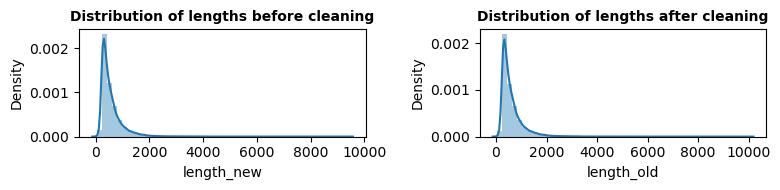

In [51]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
sns.distplot(train['length_new'])
plt.title('Distribution of lengths before cleaning',fontweight='bold',fontsize=10)
plt.subplot(1,2,2)
sns.distplot(train['length_old'])
plt.title('Distribution of lengths after cleaning',fontweight='bold',fontsize=10)
plt.tight_layout()
plt.show()

# Genre Categories

In [52]:
fiction = ['drama',  'thriller', 'adult',  'comedy', 'crime',
           'horror',  'animation', 'action', 'fantasy','sci-fi', 
           'adventure', 'western', 'family', 'romance','musical', 'war'] 

non_fiction = ['documentary','reality-tv', 'talk-show','news','biography']

mixed_genre =['short', 'sport', 'music', 'mystery', 'history','game-show']

all_genres = train.Genre.values
all_genres

array(['drama', 'documentary', 'drama', ..., 'drama', 'drama', 'thriller'],
      dtype=object)

In [53]:
genre_to_category = {}

for genre in fiction:
    genre_to_category[genre] = 'Fiction'

for genre in non_fiction:
    genre_to_category[genre] = 'Non-Fiction'

for genre in mixed_genre:
    genre_to_category[genre] = 'Mixed Genre'

# Replace genre names with category names
train['New_Genre'] = train['Genre'].map(genre_to_category)
     

In [54]:
nan_rows = train[train['New_Genre'].isnull()][['Genre', 'New_Genre']]
nan_rows

,Genre,New_Genre


In [67]:
x = train.cleaned_Description
y = train.New_Genre
y_old = train.Genre

In [56]:
train.New_Genre.unique()

array(['Fiction', 'Non-Fiction', 'Mixed Genre'], dtype=object)

New_Genre
Fiction        15037
Non-Fiction     6824
Mixed Genre     3139
Name: count, dtype: int64


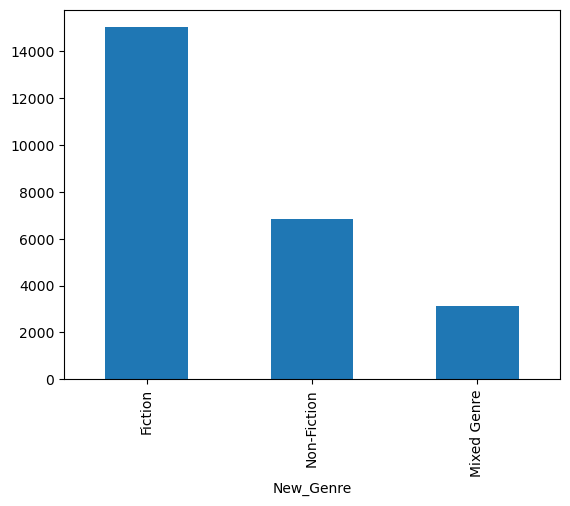

In [57]:
y.value_counts().plot(kind='bar')
print(y.value_counts())

## Encoding target variable

In [58]:
from sklearn.preprocessing import LabelEncoder

le_new = LabelEncoder()
y_new = le_new.fit_transform(y)

le_old = LabelEncoder()
y_old = le_old.fit_transform(y_old)

y= pd.DataFrame(y_new)
y_old= pd.DataFrame(y_old)

print(y.value_counts())
print(y_old.value_counts())

0    15037
2     6824
1     3139
Name: count, dtype: int64
8     6309
7     6025
5     3466
21    2294
13    1019
24     753
0      596
26     478
18     420
2      370
9      350
14     339
19     317
20     316
1      262
3      240
6      223
22     181
23     169
10     153
16     128
4      124
15     123
12     111
11      86
17      86
25      62
Name: count, dtype: int64


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state= 121, stratify= y)
xx_train, xx_test, yy_train, yy_test = train_test_split(x,y_old, test_size = 0.2, random_state= 121, stratify= y_old)

# Building Pipeline

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.metrics import *


# Text Tectorisation by TfidfVectorization

In [61]:

#Feature Extraction
vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,3), #Capture unigrams, bigrams and trigrams
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

## Pipeline #1

## Modified Genre

### With balancing the target 

In [61]:
from sklearn.naive_bayes import MultinomialNB
classifier =MultinomialNB(alpha =0.1,)
pipeline_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [62]:
y_pred_train = pipeline_balance.predict(x_train)
y_pred_test = pipeline_balance.predict(x_test)

from sklearn.metrics import *
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9691764705882353
Testing Accuracy : 0.7818666666666667


In [63]:
pipeline_balance
from sklearn.model_selection import cross_val_score
cv_train_acc =(cross_val_score(pipeline_balance, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.9691764705882353


### Without balancing the target 

In [70]:
classifier =MultinomialNB(alpha =0.3,)
pipeline = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.3))])

In [65]:
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8563764705882353
Testing Accuracy : 0.7530666666666667


In [66]:
from sklearn.model_selection import cross_val_score
cv_train_acc =(cross_val_score(pipeline, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.8563764705882353


## Original Genres

### With balancing the target

In [67]:
pipeline_balance.fit(xx_train,yy_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [68]:
y_pred_train = pipeline_balance.predict(xx_train)
y_pred_test = pipeline_balance.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.976
Testing Accuracy : 0.557


### Without balancing the target

In [69]:
pipeline.fit(xx_train,yy_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.3))])

In [70]:
y_pred_train = pipeline.predict(xx_train)
y_pred_test = pipeline.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.606
Testing Accuracy : 0.4626


## Pipeline #2

## Modified Genre

### With balancing the target

In [62]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(penalty='l1', C=1.0, class_weight='balanced', solver = 'liblinear')
pipeline_log_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_log_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [72]:
y_pred_train = pipeline_log_balance.predict(x_train)
y_pred_test = pipeline_log_balance.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8411294117647059
Testing Accuracy : 0.7434666666666667


In [73]:
cv_train_acc =(cross_val_score(pipeline_log_balance, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.8411294117647059


### Without balancing the target

In [71]:
pipeline_log = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_log.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.3))])

In [75]:
y_pred_train = pipeline_log.predict(x_train)
y_pred_test = pipeline_log.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8113411764705882
Testing Accuracy : 0.7712


## Original Genre

### With balancing the target

In [81]:
pipeline_log_balance.fit(xx_train,yy_train)
y_pred_train = pipeline_log_balance.predict(xx_train)
y_pred_test = pipeline_log_balance.predict(xx_test)

from sklearn.metrics import *
train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.75875
Testing Accuracy : 0.4654


### Without balancing the target

In [78]:
pipeline_log.fit(xx_train,yy_train)
y_pred_train = pipeline_log.predict(xx_train)
y_pred_test = pipeline_log.predict(xx_test)

from sklearn.metrics import *
train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.4912
Testing Accuracy : 0.3936


## Pipeline #3

## Modified Genre

### With balancing the target

In [79]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', gamma= 0.3 )

pipeline_svc_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_svc_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('svc', SVC(gamma=0.3, kernel='linear'))])

In [80]:
y_pred_train = pipeline_svc_balance.predict(x_train)
y_pred_test = pipeline_svc_balance.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9851294117647059
Testing Accuracy : 0.7904


### Without balancing the target

In [81]:
pipeline_svc = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_svc.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', SVC(gamma=0.3, kernel='linear'))])

In [82]:
y_pred_train = pipeline_svc.predict(x_train)
y_pred_test = pipeline_svc.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9423529411764706
Testing Accuracy : 0.7968


## Original Genre

### With balancing the target

In [83]:
pipeline_svc_balance.fit(xx_train,yy_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('svc', SVC(gamma=0.3, kernel='linear'))])

In [84]:
y_pred_train = pipeline_svc_balance.predict(xx_train)
y_pred_test = pipeline_svc_balance.predict(xx_test)


train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.98305
Testing Accuracy : 0.5746


### Without balancing the target

In [ ]:
pipeline_svc.fit(xx_train,yy_train)

In [ ]:
y_pred_train = pipeline_svc.predict(xx_train)
y_pred_test = pipeline_svc.predict(xx_test)


train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

# Pipeline #4

## Modified Genre

### With balancing the target

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =100)


pipeline_rfc_balance = make_pipeline(vectorizer, oversampler, classifier)
pipeline_rfc_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier', RandomForestClassifier())])

In [30]:
y_pred_train = pipeline_rfc_balance.predict(x_train)
y_pred_test = pipeline_rfc_balance.predict(x_test)

from sklearn.metrics import *
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9999131963282046
Testing Accuracy : 0.772162793557113


### Without balancing the target

In [33]:
pipeline_rfc = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_rfc.fit(x_train,y_train)
y_pred_train = pipeline_rfc.predict(x_train)
y_pred_test = pipeline_rfc.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

# cv_train_acc =(cross_val_score(pipeline_rfc, x_train, y_train, cv=10).mean()).round(2)*100
# print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy : 0.9998914954102559
Testing Accuracy : 0.7503996065412517


## Original Genre

### With balancing the targe

In [ ]:
pipeline_rfc_balance.fit(xx_train,yy_train)

In [ ]:
y_pred_train = pipeline_rfc_balance.predict(xx_train)
y_pred_test = pipeline_rfc_balance.predict(xx_test)

train_acc = accuracy_score(xy_train, y_pred_train)
test_acc = accuracy_score(xy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

### Without balancing the targe

In [ ]:
pipeline_rfc.fit(xx_train,yy_train)


In [ ]:
y_pred_train = pipeline_rfc.predict(xx_train)
y_pred_test = pipeline_rfc.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

# Evaluation

In [ ]:
#test = translate_descriptions(test)
#test[test.Language !='en']

In [ ]:
#train['cleaned_Description'] = train['Translated_Description'].apply(clean_text)

In [64]:
test['Description']=test['Description'].apply(clean_text)
test

,Title,Description,Language
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en
5,Er nu zhai (1955),before he wa known internationally a martial a...,en
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en


In [72]:
y_pred = pipeline_log.predict(test['Description'])

In [73]:
test['Predicted Genre'] = y_pred
test

,Title,Description,Language,Predicted Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction
...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en,Fiction


In [75]:
soution_path = 'solution.txt'
columns_solution = [ 'Title', 'Genre','Description']
solution = pd.read_csv(soution_path, sep=':::', names=columns, engine='python')
solution.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [79]:
solution['Genre'] = solution['Genre'].str.strip()
solution['New_Genre'] = solution['Genre'].map(genre_to_category)

In [80]:
actual_Genre = solution.Genre
actual_new_Genre = solution.New_Genre
#test['actual_Genre'] = actual_Genre
test['actual_Modified_Genre'] = actual_new_Genre
test

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
...,...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction,Fiction
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en,Fiction,Fiction


In [82]:
test.head(20)

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
6,Riddle Room (2016),emily burn is being held captive in room with ...,en,Fiction,Fiction
7,L'amica (1969),the beautiful but neglected wife of brilliant ...,en,Fiction,Fiction
8,Ina Mina Dika (1989),vasu inamdar ina suffers from disorder where t...,en,Fiction,Fiction
9,Equinox Special: Britain's Tornados (2005),an insight into the tornado that hit kensal ri...,en,Non-Fiction,Non-Fiction
10,Press (2011),press is story of young people overwhelmed by ...,en,Fiction,Fiction


In [88]:
correct_prediction = test[test['Predicted Genre'] == test['actual_Modified_Genre']]
correct_prediction

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
...,...,...,...,...,...
54193,Dinosaurs Decoded (2009),national geographic review jack horners resear...,en,Non-Fiction,Non-Fiction
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction,Fiction


In [90]:
incorrect_prediction = test[test['Predicted Genre'] != test['actual_Modified_Genre']]
incorrect_prediction

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
15,Das letzte Mal (2000),on the night husband finally brings himself to...,en,Fiction,Mixed Genre
20,A Case of Mistaken Identity? (2008),joseph jacoby introduces himself he writer and...,en,Fiction,Non-Fiction
21,Dinner for Three (2016),trevor life alone in the middle of nowhere but...,en,Fiction,Mixed Genre
22,Crack Baby (????),when privileged student filmmaker team up with...,en,Non-Fiction,Fiction
23,Paper Marilyn (1994),the life and work of venetian artist entertain...,en,Fiction,Non-Fiction
...,...,...,...,...,...
54189,Strom ohne Grenzen (1952),he morava river with it forest is one of the m...,en,Non-Fiction,Mixed Genre
54191,"""House Invaders"" (1998)",house invader feature different home each epis...,en,Fiction,Non-Fiction
54194,The World of Art Presents: Drawing for Anyone...,jump right in to drawing animal along with chu...,en,Non-Fiction,Fiction
54195,Slender Existence (2000),slender existence is the first ever personal f...,en,Fiction,Mixed Genre


In [89]:
Correct_prediction_percentage = len(correct_prediction)*100/len(test)
Correct_prediction_percentage

75.02583025830258

In [91]:
Incorrect_prediction_percentage = len(incorrect_prediction)*100/len(test)
Incorrect_prediction_percentage

24.974169741697416